# **CMB Angular Power Spectra plots**
## Hu-Sawicki f(R) model vs ΛCDM

In [1]:
#Import packages
import numpy as np
import classy
from classy import Class
import csv

### Read the Planck data (Downloaded from [the ESA Archive](https://pla.esac.esa.int/#home))

In [2]:
#------------------------------------------------------------------------------------------------
#TT polarization
#------------------------------------------------------------------------------------------------
data_Planck = np.loadtxt('./COM_PowerSpect_CMB-TT-binned_R3.01.txt')
ls_Planck_TT = data_Planck[:, 0] #Multipole moment
dl_Planck_TT = data_Planck[:, 1] #dlTTs
sdl_Planck = data_Planck[:, 2] #error of dlTTs

#------------------------------------------------------------------------------------------------
#TE polarization
#------------------------------------------------------------------------------------------------
data_Planck = np.loadtxt('./COM_PowerSpect_CMB-TE-binned_R3.02.txt')
ls_Planck_TE = data_Planck[:, 0] #Multipole moment
dl_Planck_TE = data_Planck[:, 1] #dlTEs
sdl_Planck_TE = data_Planck[:, 2] #error of dlTEs

#------------------------------------------------------------------------------------------------
#EE polarization
#------------------------------------------------------------------------------------------------
data_Planck = np.loadtxt('./COM_PowerSpect_CMB-EE-binned_R3.02.txt')
ls_Planck_EE = data_Planck[:, 0] #Multipole moment
dl_Planck_EE = data_Planck[:, 1] #dlEEs
sdl_Planck_EE = data_Planck[:, 2] #error of dlEEs

## Initialize [MG-CLASS](https://gitlab.com/zizgitlab/mgclass--ii/) for Hu-Sawicki f(R) and ΛCDM

In [3]:
#------------------------------------------------------------------------------------------------
#Initialize LCDM model: F_R0 = 0, FRn= 0,
#------------------------------------------------------------------------------------------------
params = {'A_s': 2.100549e-09,
          'n_s': 0.9660499,
          'h': 0.6732117,
          'omega_b': 0.02238280,
          'omega_cdm': 0.1201075,
          'tau_reio': 0.05430842,
          'gauge':'newtonian', #FOR MGCLASS TO WORK, GAUGE NEEDS TO BE NEWTONIAN
          'output': 'tCl, pCl, lCl',
          'l_max_scalars': 2000,
          } 

label = '_FR0_LCDM'
FR00 = 1.e-90
LambdaCDM = Class()        

params['mg_ansatz'] = 'FR'

model_params = {                
        'F_R0': FR00,
        'FRn': 0.}

params.update(model_params)

LambdaCDM.set(params)
LambdaCDM.compute()

#------------------------------------------------------------------------------------------------
#Initialize Feature Template model: F_R0 = 1.e-7, FRn = 1,
#------------------------------------------------------------------------------------------------
params['mg_ansatz'] = 'FR'

model_params = {                
        'F_R0': 1.e-7, 
        'FRn': 1.}

params.update(model_params)

HS = Class()
HS.set(params)
HS.compute()

    ******************************************
       Modified Gravity extensions enabled:  
       Modifications active for z < 6.000    
       For the FR model
    ******************************************
    ******************************************
       Modified Gravity extensions enabled:  
       Modifications active for z < 6.000    
       For the FR model
    ******************************************


In [4]:
#Get all C_ls output
cls1 = LambdaCDM.raw_cl(2000) #LCDM
cls2 = HS.raw_cl(2000) #Feature
# To check the format of cls
cls1.keys()

ll = cls1['ell'][2:] #Multipole moment l
clTT_LCDM = cls1['tt'][2:] #TT polarization
clTE_LCDM = cls1['te'][2:] #TE polarization
clEE_LCDM = cls1['ee'][2:] #EE polarization

clTT_HS = cls2['tt'][2:] #TT polarization
clTE_HS = cls2['te'][2:] #TE polarization
clEE_HS = cls2['ee'][2:] #EE polarization

In [5]:
import matplotlib.pyplot as plt
from math import pi

#Conversion factor between Class (dimensionless) and CAMB (micro-Kelvin^2) values 
Tcmb = 2.7255
CF = (Tcmb*10**6)**2

#Function for converting the c_ls^TT to Dls (for plotting and comparing)
import math
def Dls(l,CTT):
    Dl = [CF*l[i]*(l[i]+1)*CTT[i]/(2*math.pi) for i in range(len(l))]
    return Dl

ls = list(range(len(clTT_LCDM)))
dl = Dls(ls,clTT_LCDM)

## Plot the $C^{TT}_{\ell}$ polarization component: HS vs ΛCDM

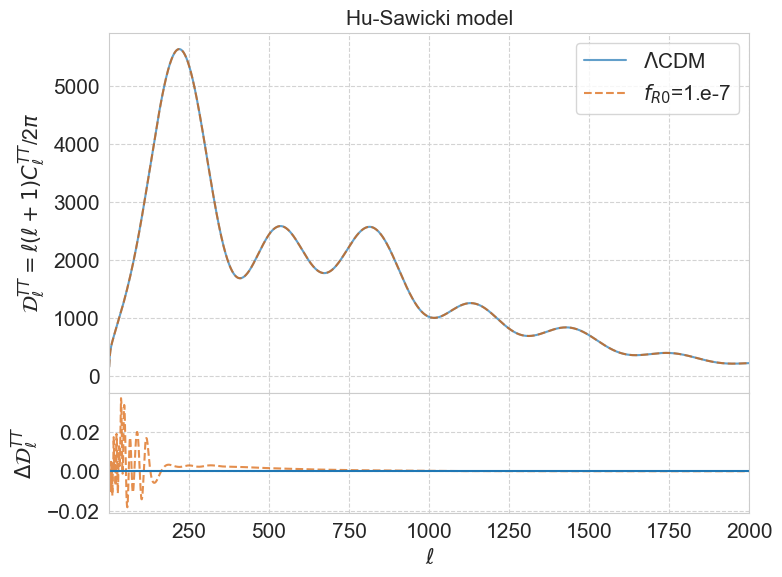

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

#sns.set_theme()
sns.set_style("whitegrid", {
    'grid.color': 'lightgray',      # Set grid color to gray
    'grid.linestyle': '--',    # Set grid line style to dashed
    'axes.facecolor': 'white'  # Set background color to white
})
palette = sns.color_palette("Dark2", 3) 

fsize = 15
fig = plt.figure(figsize=(8, 6))
frame1 = fig.add_axes((.1,.3,.8,.6))
plt.title('Hu-Sawicki model', fontsize=fsize)
plt.xlim(2,2000)
plt.plot(ls, dl, label='$\Lambda$CDM', alpha=0.7)
plt.plot(ls, Dls(ls, clTT_HS), '--', label='$f_{R0}$=1.e-7', alpha=0.7, color=palette[1])
#plt.plot(ls_Planck, dl_Planck, 'o', markersize=3, label='Planck')
plt.xlabel('${\ell}$', fontsize=fsize)
plt.ylabel('$ \mathcal{D}^{TT}_{\ell} = {\ell}({\ell}+1) C^{TT}_{\ell}$/2$\pi$', fontsize=fsize)
plt.xticks(fontsize=1)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=fsize)

# Residual plot
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 
round_ls_Pl = np.round(ls_Planck_TT)   
diff0 = []
for i in range(len(ls)):
    diff0.append(Dls(ls, clTT_HS)[i] - dl[i]) #int because i outputs a .0 number, not integer

plt.plot(ls, diff0, '--', label='Fr0=1.e-7', alpha=0.7, color=palette[1])
plt.ylabel('$\Delta \mathcal{D}^{TT}_{\ell}$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
frame2.axhline(y=0)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./clstt_FR0.pdf', bbox_inches='tight')
plt.show()

## Plot the $C^{TE}_{\ell}$ polarization component: HS vs ΛCDM

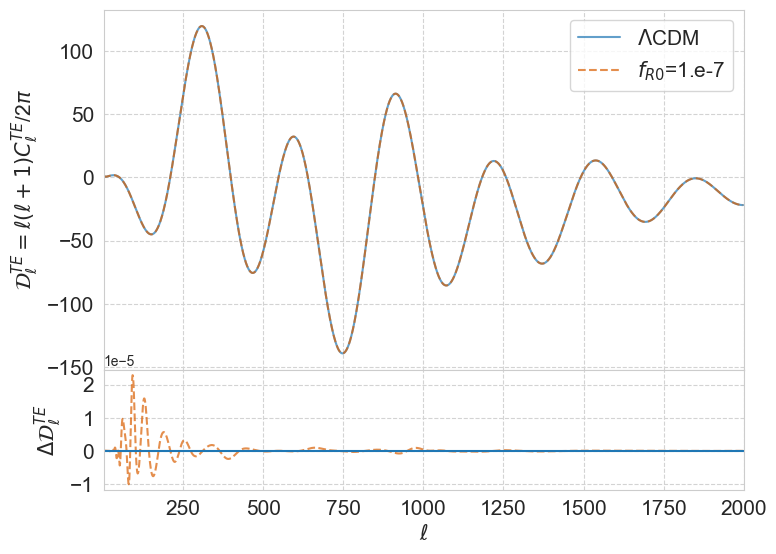

In [7]:
#sns.set_theme()
sns.set_style("whitegrid", {
    'grid.color': 'lightgray',      # Set grid color to gray
    'grid.linestyle': '--',    # Set grid line style to dashed
    'axes.facecolor': 'white'  # Set background color to white
})
palette = sns.color_palette("Dark2", 3) 

fsize = 15
fig = plt.figure(figsize=(8, 6))
frame1 = fig.add_axes((.1,.3,.8,.6))
plt.xlim(2,2000)
plt.plot(ls, Dls(ls, clTE_LCDM), label='$\Lambda$CDM', alpha=0.7)
plt.plot(ls, Dls(ls, clTE_HS), '--', label='$f_{R0}$=1.e-7', alpha=0.7, color=palette[1])
#plt.plot(ls_Planck, dl_Planck, 'o', markersize=3, label='Planck')
plt.xlabel('Multipole moment ${\ell}$', fontsize=fsize)
plt.ylabel('$ \mathcal{D}^{TE}_{\ell} = {\ell}({\ell}+1) C^{TE}_{\ell}$/2$\pi$', fontsize=fsize)
plt.xticks(fontsize=1)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=fsize)

# Residual plot
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 
round_ls_Pl = np.round(ls_Planck_TT)   
diff0 = []
for i in range(len(ls)):
    diff0.append(Dls(ls, clTE_LCDM)[i] - Dls(ls, clTE_HS)[i]) #int because i outputs a .0 number, not integer

plt.plot(ls, diff0, '--', label='Fr0=1.e-7', alpha=0.7, color=palette[1])
plt.ylabel('$\Delta \mathcal{D}^{TE}_{\ell}$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
frame2.axhline(y=0)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./clste_FR0.pdf', bbox_inches='tight')
plt.show()

## Plot the $C^{EE}_{\ell}$ polarization component: HS vs ΛCDM

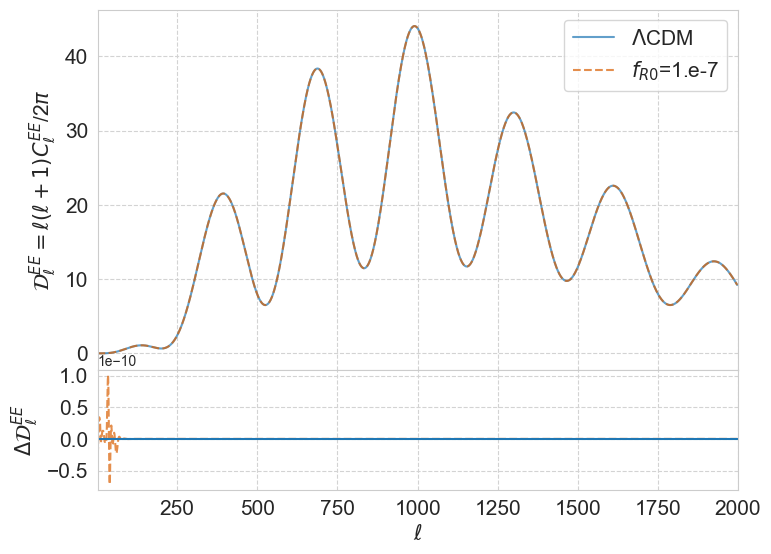

In [8]:
#sns.set_theme()
sns.set_style("whitegrid", {
    'grid.color': 'lightgray',      # Set grid color to gray
    'grid.linestyle': '--',    # Set grid line style to dashed
    'axes.facecolor': 'white'  # Set background color to white
})
palette = sns.color_palette("Dark2", 3) 

fsize = 15
fig = plt.figure(figsize=(8, 6))
frame1 = fig.add_axes((.1,.3,.8,.6))
plt.xlim(2,2000)
plt.plot(ls, Dls(ls, clEE_LCDM), label='$\Lambda$CDM', alpha=0.7)
plt.plot(ls, Dls(ls, clEE_HS), '--', label='$f_{R0}$=1.e-7', alpha=0.7, color=palette[1])
#plt.plot(ls_Planck, dl_Planck, 'o', markersize=3, label='Planck')
plt.xlabel('Multipole moment ${\ell}$', fontsize=fsize)
plt.ylabel('$ \mathcal{D}^{EE}_{\ell} = {\ell}({\ell}+1) C^{EE}_{\ell}$/2$\pi$', fontsize=fsize)
plt.xticks(fontsize=1)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=fsize)

# Residual plot
frame2 = fig.add_axes((.1,.1,.8,.2), sharex=frame1) 
round_ls_Pl = np.round(ls_Planck_TT)   
diff0 = []
for i in range(len(ls)):
    diff0.append(Dls(ls, clEE_LCDM)[i] - Dls(ls, clEE_HS)[i]) #int because i outputs a .0 number, not integer

plt.plot(ls, diff0, '--', label='Fr0=1.e-7', alpha=0.7, color=palette[1])
plt.ylabel('$\Delta \mathcal{D}^{EE}_{\ell}$', fontsize=fsize)
plt.xlabel('${\ell}$', fontsize=fsize)
frame2.axhline(y=0)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./clsee_FR0.pdf', bbox_inches='tight')
plt.show()